# Assignment 1

## Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialdata2023/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc.), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Monday February 27th, 2023 at 23:55. Hand in your files via [http://peergrade.io](http://peergrade.io/).

**Peergrading date and time**: _Remember that after handing in you have 1 week to evaluate a few assignments written by other members of the class_. 

## A1 Part 1: Visualizing patterns in the data

In this sub-assignment, we recreate some of the plots from Week 2. We look only at the focus-crimes.

In [2]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

For each set of plots below, describe the plots (as you would in the figure text in a report or paper), and pick a few aspects that stand out to you and comment on those (we provided a couple of ideas during class but it's OK to add more).
* First create the week-day plots, the months, the 24-hour cycle, and the 168 hours of the week as barcharts (Week 2, Part 2).
* Next choose a crime type that you like and create a calendar plot (Week 2, Part 4). Don't forget to comment on patterns you observe.
* Finally, choose a different crime type and create a polar plot of its 24hour cycle (Week 2, Part 4). Again, don't forget to comment as you would in a figure text.

#### Loading and preparing the data for A1 Part 1

In [1]:
from datetime import datetime
import pandas as pd 
import matplotlib.pyplot as plt 
plt.rcParams["font.family"] = "Georgia"

# Load, specify columns and convert to datatime
report_data = pd.read_csv("../1_opstart/Data/data_2003_to_May_2018.csv")#pd.read_csv("../Datasets/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")
report_data = report_data[['Category', 'Date', 'Time', 'DayOfWeek', 'PdDistrict', 'IncidntNum']]
report_data["Date"] = pd.to_datetime(report_data.Date, format = "%m/%d/%Y")
report_data["Hour"] = pd.to_datetime(report_data["Time"], format="%H:%M").dt.hour

# Extract relevant time-periods
report_data["Weekday"] = report_data["Date"].dt.day_name()
report_data["Month"] = report_data["Date"].dt.month_name()
report_data["12_hours"] = [datetime.strftime(datetime.strptime(str(t), "%H"), "%I %p") for t in report_data["Hour"] ]
report_data["Weekday_Hour"] = report_data["Weekday"] + " " + report_data["12_hours"] 

# Order 
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
hour_order = [datetime.strftime(datetime.strptime(str(t), "%H"), "%I %p") for t in range(24)]
weekday_hour_order = [weekday + " " + hour for weekday in weekday_order for hour in hour_order]


#### Functions for plotting the different kinds of plots requested in the three subquestions

In [44]:
### Function to blot n reported crimes in a focus-category into a timeperiod
def subset_and_aggregate_data(data, crime_type, period_col, xtick_order):
    sub_data = data.query(f"Category == '{crime_type}'")
    reports_in_periods = sub_data.value_counts(period_col)
    return reports_in_periods.reindex(xtick_order)

def make_bar_plot(data,
                  crime_type, 
                  period_col, 
                  xtick_order, 
                  ax, 
                  exclude_xticks = True,
                  costum_xticks = False,
                  costum_title = False):
    
    reports_in_periods = subset_and_aggregate_data(data, crime_type, period_col, xtick_order)
    if costum_title:
        reports_in_periods.plot.bar(title = costum_title, ax=ax, color = "skyblue")
    else:
        reports_in_periods.plot.bar(title = crime_type.title(), ax=ax, color = "skyblue")
    ax.set_xlabel("")
    ax.set_ylabel("Crimes reported")

    if costum_xticks:
        ax.set_xticks(ticks = ax.get_xticks().tolist(), labels=costum_xticks, rotation=90)

    if exclude_xticks:
        ax.set_xticks([])


def update_axes_idx(itr, ax_row_idx, ax_col_idx):
    if (itr % 2) == 1: # after uneven iterations - new row, reset col_idx
        ax_row_idx += 1
        ax_col_idx = 0
    else: # after even iterations - Next column
        ax_col_idx += 1

    return ax_row_idx, ax_col_idx


def plot_reports_in_periods(data, period_col, xtick_order, x_label, title, n_fig_rows, n_fig_cols, costum_xticks = False):
    fig, ax = plt.subplots(n_fig_rows, n_fig_cols, figsize = (8, 20))
    exclude_xticks = True

    ax_row_idx, ax_col_idx = 0, 0 # indexes for the "ax"-attribute

    for itr, cat in enumerate(focuscrimes):
        make_bar_plot(data, crime_type = cat, period_col = period_col, xtick_order = xtick_order, ax = ax[ax_row_idx][ax_col_idx], exclude_xticks = exclude_xticks, costum_xticks=costum_xticks)
        ax_row_idx, ax_col_idx = update_axes_idx(itr, ax_row_idx, ax_col_idx)
        if (ax_row_idx+1) == n_fig_rows:
            exclude_xticks = False

    ax[6][0].set_xlabel(x_label)
    ax[6][1].set_xlabel(x_label)

    plt.suptitle(title, y = 1.005, size = 20)
    plt.tight_layout()

#### Overall comments regarding the plotting of crime in A1 Part 1
Before providing any commentary on the plots presented in this exercise, it is important to note that the axes in all plots are in absolute numbers. Therefore, drawing direct comparative conclusions between different crime types based solely on these numbers may be misleading. To make comparisons more relevant, it is advisable to standardize the axes and provide a relative value.

Additionally, the observations made are based solely on visual inspection of the data. To make scientifically significant observations, statistical tests would be invaluable in determining the significance of the patterns of occurrence and prevalence for each crime type. Therefore, it is important for further studies to apply appropriate statistical analyses to the data to ensure any observations are statistically significant and reliable. 


**Question 1.1:** First create the week-day plots, the months, the 24-hour cycle, and the 168 hours of the week as barcharts (Week 2, Part 2).

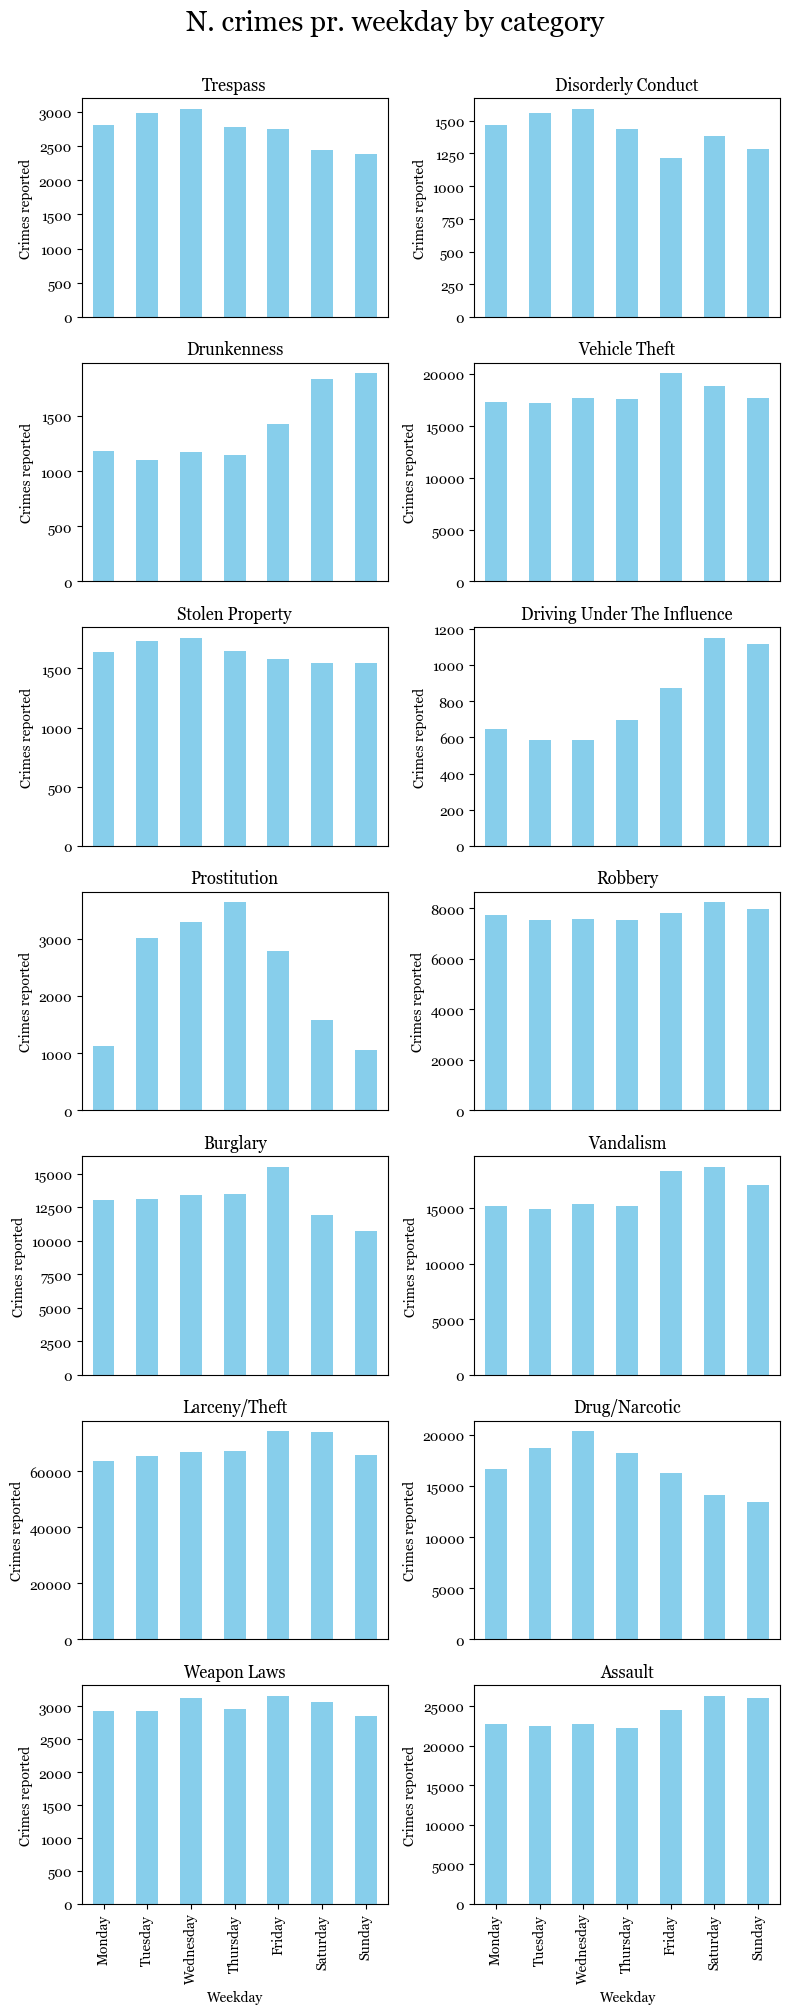

In [83]:
plot_reports_in_periods(report_data, 
                        period_col = "Weekday", 
                        xtick_order = weekday_order, 
                        x_label = "Weekday", 
                        title = "N. crimes pr. weekday by category", 
                        n_fig_rows = 7, 
                        n_fig_cols = 2)

***Comment on Week-day plot:***

The 14 plots presented above depict the prevalence of focuscrimes on each of the seven weekdays, providing insight into their weekly patterns. The data shows that while we categorize all of these offences as crimes, they do not necessarily share the same characteristics or exhibit the same trends. The majority of the crimes display a very low variance, eg. Weapon laws, Robbery, Assault etc. However some also follow a another pattern. Driving under the influence and Drunkenness are most prevalent at Fridays or Saturdays, coinciding with the days alcohol consumption is likely to be highest. Conversely, the prevalence of Prostitution is highest on Tuesdays, Wednesdays and Thursdays. Maybe this relative high rate of prostitution in the weekday is because people feel more lonely in the weekdays than in the weekends. 

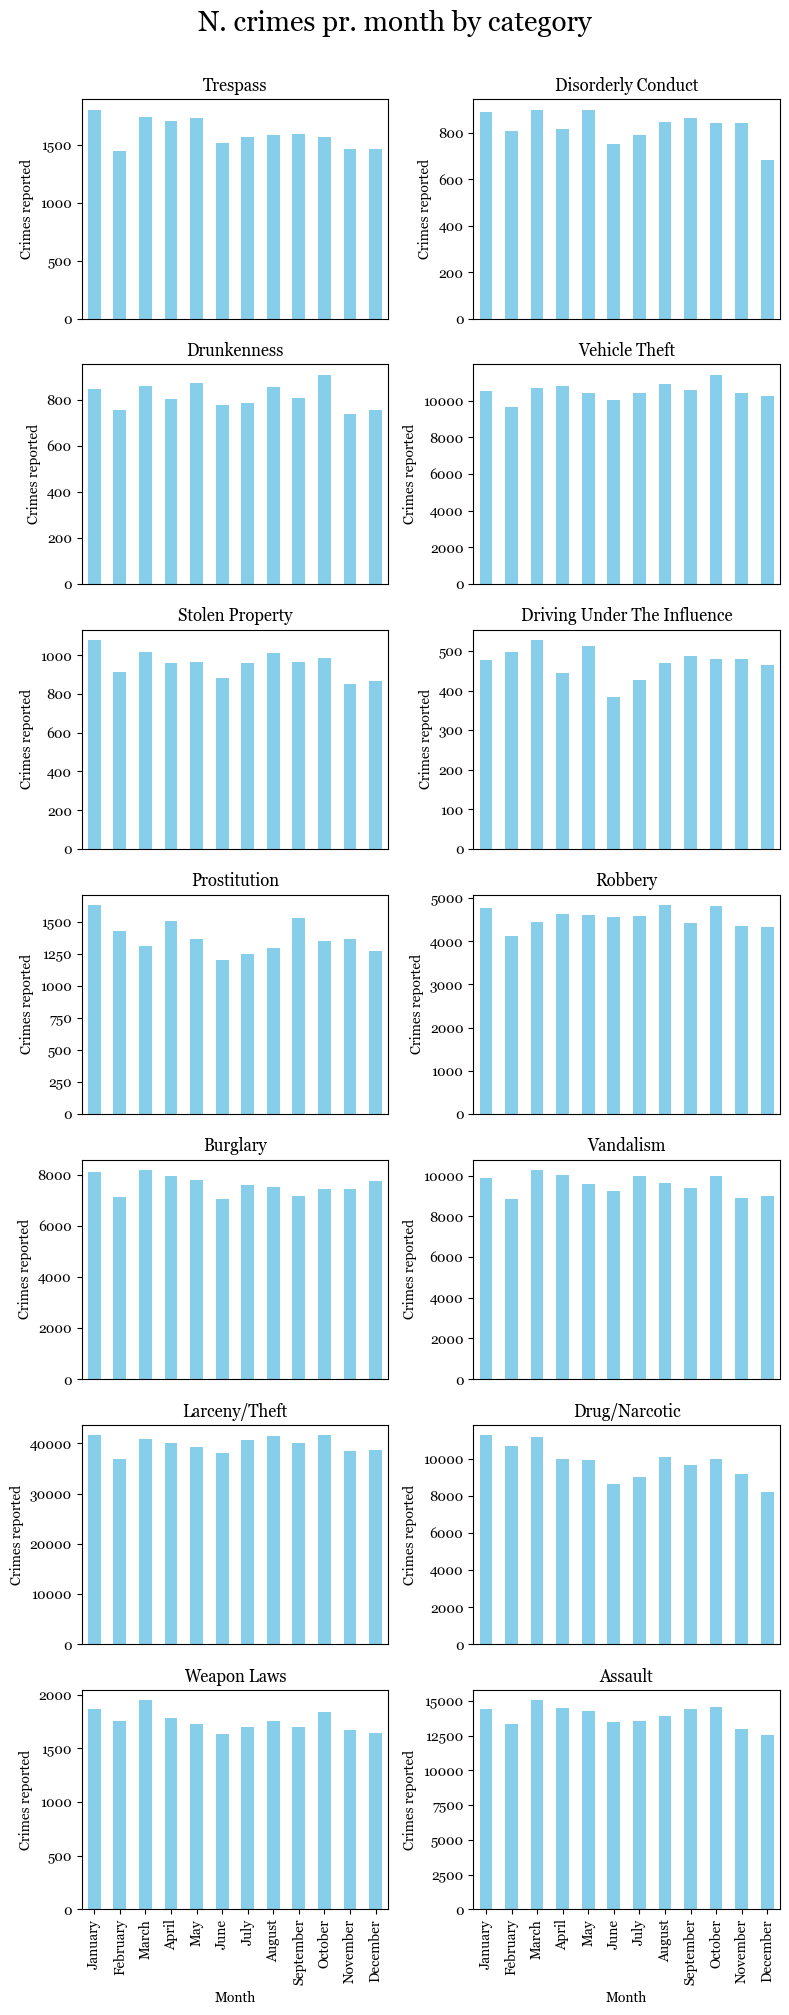

In [84]:
plot_reports_in_periods(report_data, 
                        period_col = "Month", 
                        xtick_order = month_order, 
                        x_label = "Month", 
                        title = "N. crimes pr. month by category", 
                        n_fig_rows = 7, 
                        n_fig_cols = 2)

***Comment on Month plot:***

The 14 plots depicted above presents the prevalence of each crime in the different months. When examining the occurences of different types of crimes by month, a noteworthy trend is that there appears to be lower overall crime rate in December. Why is this the case? Two possible explanations for this pattern can be considered. One explanation is that individuals may be less likely to engage in criminal activity during the Christmas holliday season. Alternatively, the decrease in police presence, due to either holidays-related assignments or a reduced number of officers on duty as they celebrate Christmas with their families. Further research into this trend may provide valuable insights into the factors that influence criminal behavior and law enforcements efforts. 

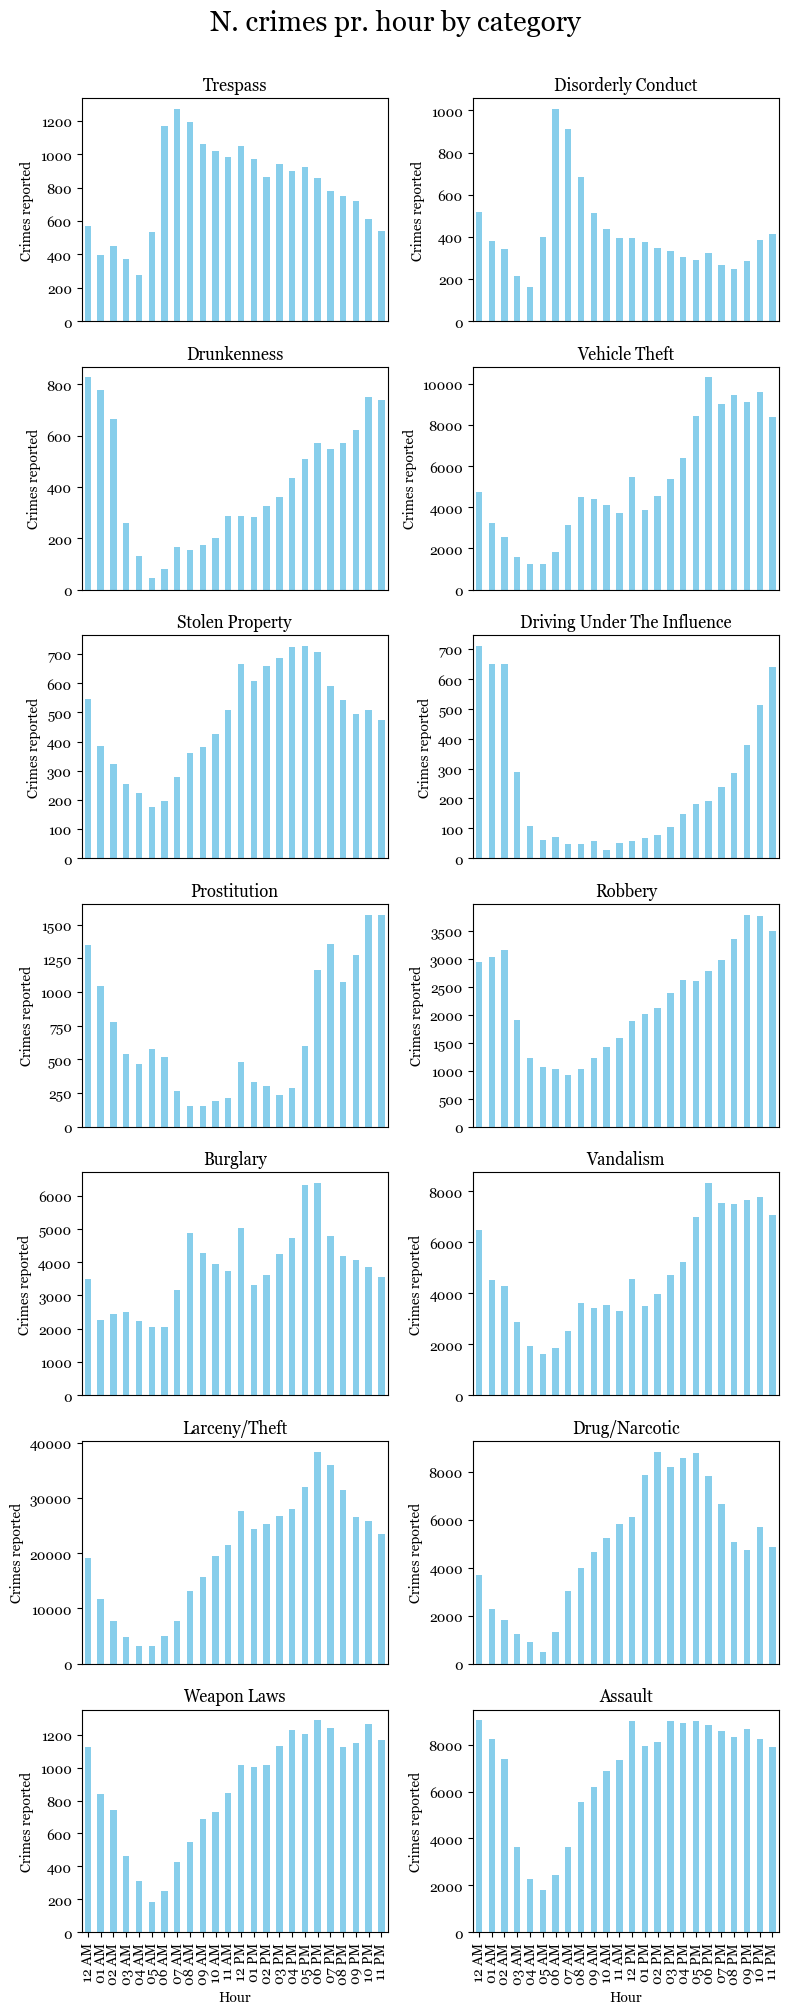

In [85]:
plot_reports_in_periods(report_data, 
                        period_col = "12_hours", 
                        xtick_order = hour_order, 
                        x_label = "Hour", 
                        title = "N. crimes pr. hour by category", 
                        n_fig_rows = 7, 
                        n_fig_cols = 2)

***Comment on 24-hour cycle plot:***

The 14 plots above display the prevalence of each crime type throughout the day. A general trend observed for several crime types is that their prevalence decreases during late night and very early morning hours. This pattern is evident for offenses such as Assault, Weapon Laws, Larceny/Theft, and Drug/Narcotic-related offenses. However, Prostitution does not follow this pattern, and its prevalence appears to be lower around 8 am. Driving under the influence also exhibits a different pattern, as it is more prevalent during nighttime hours. Further exploration of these trends could provide valuable insights into the temporal patterns of criminal activity and could help inform law enforcement efforts accordingly.

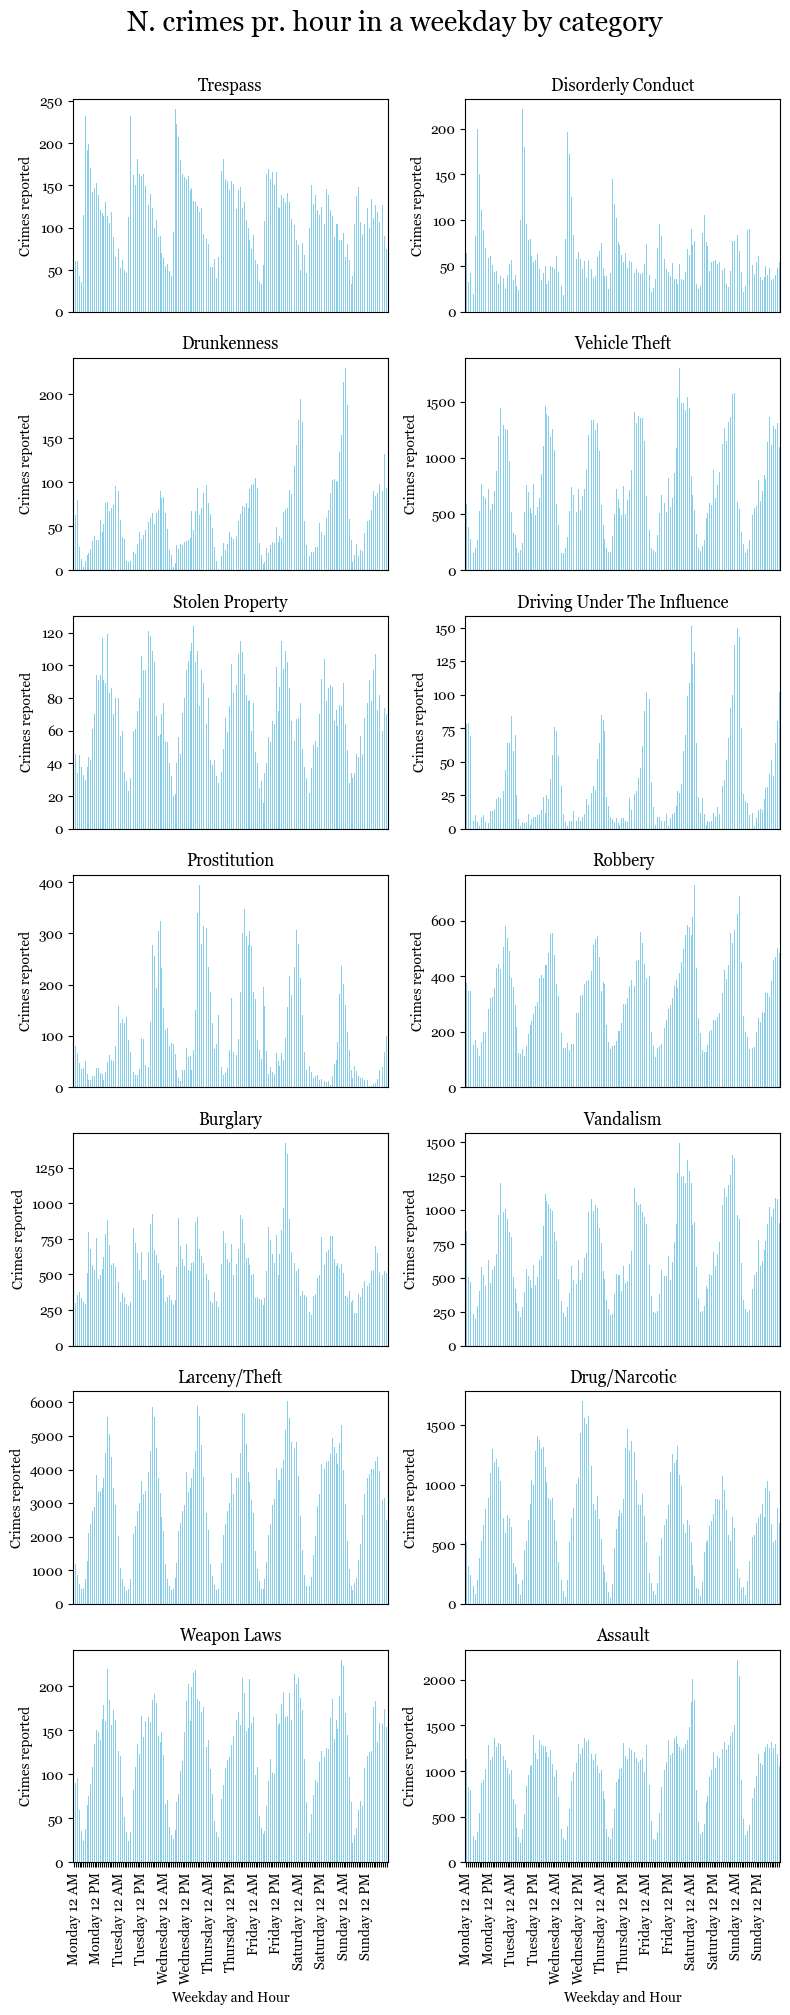

In [89]:
custom_xticks_weekday_hour = [weekday_hour if "12" in weekday_hour else "" for weekday_hour in weekday_hour_order]

plot_reports_in_periods(report_data, 
                        period_col = "Weekday_Hour", 
                        xtick_order = weekday_hour_order, 
                        x_label = "Weekday and Hour", 
                        title = "N. crimes pr. hour in a weekday by category", 
                        n_fig_rows = 7, 
                        n_fig_cols = 2,
                        costum_xticks = custom_xticks_weekday_hour)

***Comment on the 168 hours of the week plot:***

Overall, these plots provide further insight into the patterns between weekday and hour of criminal activity, which we have previously commented on in earlier plots. Similar to previous observations, we see Prostitution following the same pattern of being most prevalent on Tuesdays, Wednesdays, and Thursdays. There is also an overall general pattern of decreased criminal activity during very late night/early morning hours. Additionally, Assault is more prevalent on Saturdays and Sundays, while Burglary is most prevalent on Friday evenings.

However, it is worth noting that these plots are quite complex in wanting to show patterns between 14 crimetypes and time of the week. Thus drawing visual conclusions from them may be challenging. When creating plots, it is important to consider whether their complexity succeeds in simplifying the data to enable the human eye to detect patterns in complex data. In this case, the earlier plots may have been more effective in achieving this goal than these plots. 

##(MÅSKE den nederste del af det her skal UD KIG HER ESBEN)

**Question 1.2:**: Next choose a crime type that you like and create a calendar plot (Week 2, Part 4). Don't forget to comment on patterns you observe.

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


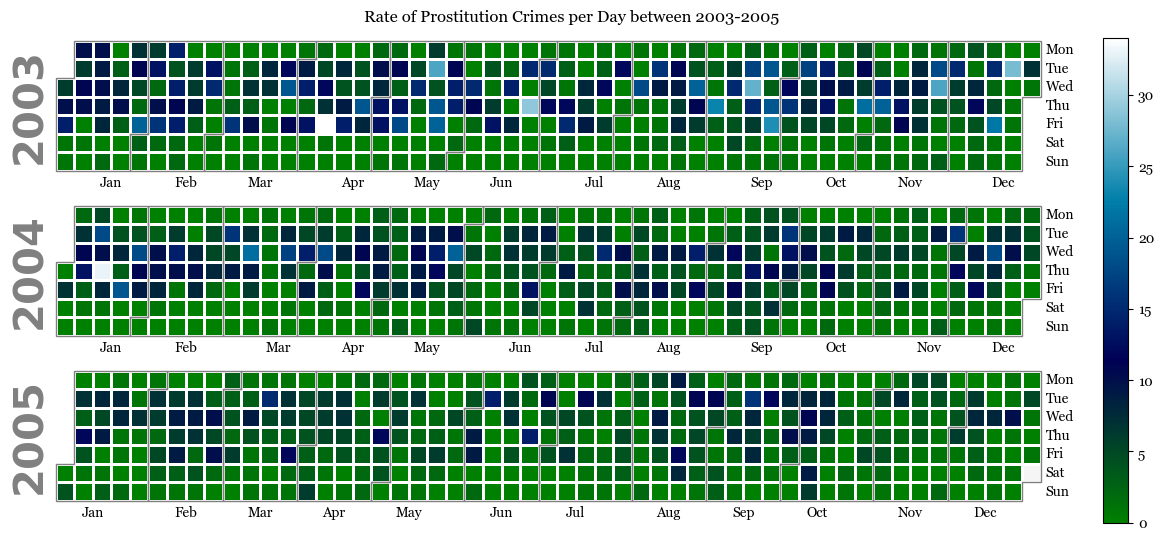

In [6]:
import calplot

# Skal den 
# DEN DER ERROR ER VÆK NU. GIV DET LIGE ET KIG.


plt.rcParams["font.family"] = "Georgia"  

crime_type = "PROSTITUTION"

calplot_data = report_data.assign(Year = report_data.Date.dt.year).query("Year <= 2005").\
    query(f"Category == '{crime_type}'").groupby("Date").count().Category

calplot.calplot(calplot_data, cmap="ocean", suptitle='Rate of Prostitution Crimes per Day between 2003-2005', colorbar=True);

**Answer 1.2:**

In the above plot you can view the crime rate of prostitution throughout the years of 2003, 2004, and 2005. In the plot it is possible to view how the crime rate of prostitution have evolved throughout the years. Prostitution is the most prevalent in Tuesday, Wednesday and Thursday. An explanation of this could be that people maybe feel more lonely these times, or maybe it is harder to find sexual partners in the weekdays than in the weekends, and therefore people go to prostitutes in the weekdays. 

**Question 1.3:**: Finally, choose a different crime type and create a polar plot of its 24hour cycle (Week 2, Part 4). Again, don't forget to comment as you would in a figure text.

In [7]:
import plotly.express as px

crime_type = "DRIVING UNDER THE INFLUENCE"

test_data = report_data.query(f"Category == '{crime_type}'").value_counts("12_hours").reindex(hour_order).reset_index().rename(columns = {0:"count"})
fig = px.scatter_polar(test_data, r="count", theta="12_hours")
fig.update_traces(fill='toself')
fig.update_layout(
    title = "Crime rate of driving under the influence throughout the day",
    font_size = 15,
    paper_bgcolor = "rgb(223, 223, 223)")
fig.show()

**Answer 1.3:**

This polar plot illustrates the high variance of the Driving under the influence througout the day. The data suggests that police could consider concentrating their efforts on Driving under the influence during evening and midnight and focus on other types of crimes during the daytime. However, it's possible that the reason why the data is so skewed is because the police are already prioritizing enforcement during those hours. One could fear that there are still drunk drivers in the morning, but police are not actively looking for them at that time.

## A1 Part 2: Dataviz questions 

Have a look at the encoding dataviz lecture (Week 4), then answer the following questions in your own words. 

* Mention 10 examples of ways we can encode data.
* Are all encodings created equally? Why not? Can you think of an example from the previous lectures?
* Mention 3 encodings that are difficult for the human eye to parse. Can you find an example of a visualization online that uses one of those three?
* Explain in your own words: What is the problem with pie-charts?

**Question 2.1:** Mention 10 examples of ways we can encode data.

**Answer 2.1:**
There are various ways to encode data for analysis and modeling purposes. Here are 10 examples:

1: Grouping data by variables using commands such as "group_by" in Python.

2: Converting image data into numerical arrays to make it accessible for deep learning models.

3: Converting time variables to timestamps to make it easier to perform time-based calculations and analysis.

4: Collapsing or transforming variables to simplify or focus on areas of interest. For example collapsing peoples income to make a distinction between poor and rich. 

5: Representing audio signals as numerical values for analysis.

6: Representing bodily features such has blood pressure and heart rate to find stresslevels.  

7: Alot of weather data is encoded to show or forecast weather. Temperature, precipitation or wind are all used for analysing patterns and conclude on whether it will be a good or bad season. 

8: Making a measure of left- or right wing oriented media based on scores derived from the sentiment or ideology expressed in their articles. 

9: Companies such as Google of Facebook encode website bevahior to use for their targeted add and recommendation models.

10: When graphically visualising 3D models encoding is important for the models to be able to work with the data.

**Question 2.2:** Are all encodings created equally? Why not? Can you think of an example from the previous lectures?

**Answer 2.2:**

Sunes uses the piechart in the video as an example of why not all encodings are created equally. He argues that the encodings should make the data more clear, and this is not succesfully achived with sizes, angles or color intensity. 

Two examples of plots we have from these past lectures are either the calendarplot from Week 2 or the map we created of San Francisco in Week 3. Both plots also show an overall spread of the crimes throughout the year or throughout the different quaters in San Francisco using color instensity, but maybe simpler barplots would actually show the same patterns in a more clear and accessible way. 

**Question 2.3:**  Mention 3 encodings that are difficult for the human eye to parse. Can you find an example of a visualization online that uses one of those three?

**Answer 2.3:**

1: Multiple of the data compression methods are not neccesarily easily read. For example if one converts textual data into a numerical vector as with TF-IDF, one would still need to graph the scores if one were to see and find anything. 

2: Multiple techniques for making data ready for machine learning models are also not very accessible for the human eye. But instead they make the data better for the machine learning model to run, one example of this could be a Principal Component Analysis. 

3: One way of encoding data is through a logaritmic scale, which is not easily read with the human eye, but makes a world of difference in a graph. By implementing a logarithmic scale it becomes possible to see the evolution of data throughout a fixed factor. With for example a stock, it is just as good for the stock price to go from 1$ to 2$ as it is if the stock goes from 200$ to 400$, therefore a logarithmic scale would be more usefull if one were trying to understand a stocks price evolution throughout its existence. 

In the television show "Dopesick" they used this distinction between linear and logarithmic scale graphs as a point for cheating lawmakers to accept Oxycontin, for a quick resume see [this video](https://www.youtube.com/watch?v=y305az3PQLk).


**Question 2.4:**  Explain in your own words: What is the problem with pie-charts?

**Answer 2.4:**

Sune states that pie charts are bad because they visualise data through areal, which is hard for human eyes to navigate. Overall a pie chart only seems usefull when visualising very simple dataforms, if ones pie chart have many slices or slices which are close to the same size a pie chart easily becomes unreadable. It would also be problematic with a pie chart if ones data does not add up to a 100%, this would make some slices look smaller or bigger because the pie chart needs to accumulate to 100% (VED IKKE HELT MED DET HER). 

## A1 Part 3: Visualizing geodata using Plotly

In this sub-assignment I want you to create a choropleth map of San Francisco, showing where it's safest to leave your car on Sundays, following the instructions from Week 3.

When you're done, reflect on the following questions.

* Based on your map and analysis, where should you park the car for it to be safest on a Sunday? And where's the worst place?
* Using visualizations can help us uncover powerful data-patterns. However, when designing visualizations, we need to be aware of several illusions that can lead viewers to misinterpret the data we are showing (i.e. perceptual errors):
   - Try to change the range of data-values in the plot above. Is there a way to make the difference between district less evident?
   - Why do you think perceptual errors are a problem? Try to think of a few examples. 

**Question 3.1:**: In this sub-assignment I want you to create a choropleth map of San Francisco, showing where it's safest to leave your car on Sundays, following the instructions from Week 3.

In [34]:
import requests
# Load shapefile
shape_file = requests.get("https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson").json()
# Subset crimedata and count occurances by district 
vehicle_theft_sunday_data = report_data.query("Category == 'VEHICLE THEFT' and DayOfWeek == 'Sunday'")
vehicle_theft_sunday_by_district = vehicle_theft_sunday_data.PdDistrict.value_counts().reset_index()
vehicle_theft_sunday_by_district.columns = ["District", "reported_crimes"]

In [35]:
max_color_range = vehicle_theft_sunday_by_district.reported_crimes.max()

fig = px.choropleth_mapbox(vehicle_theft_sunday_by_district,
                           geojson=shape_file,
                           locations='District',
                           color='reported_crimes',
                           color_continuous_scale="ylorbr",
                           range_color=(0, max_color_range),
                           mapbox_style="carto-positron",
                           zoom = 10.9, 
                           center = {"lat": 37.767, "lon": -122.4256},
                           opacity=0.5,
                           labels={'reported_crimes':'Reported Vehicle Theft'}
                          )

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


**Question 3.2:** Based on your map and analysis, where should you park the car for it to be safest on a Sunday? And where's the worst place?


**Answer 3.2:** The immidiate impression is, that Tenderloin is the best place to park your car, while Ingleside is the most risky district. However, Tenderloin is a substantially smaller area then the remaining district, so it could be relevant to also account for how big/populated the districts are. Furthermore one could also fear that the number of crimes show were the police is active, and not so much whether the district is safe or not to park ones car. 

**Question 3.3:** Using visualizations can help us uncover powerful data-patterns. However, when designing visualizations, we need to be aware of several illusions that can lead viewers to misinterpret the data we are showing (i.e. perceptual errors):
   - **3.3.1**: Try to change the range of data-values in the plot above. Is there a way to make the difference between district less evident?
   - **3.3.2**: Why do you think perceptual errors are a problem? Try to think of a few examples. 

In [42]:
max_color_range = 100_000_000

fig = px.choropleth_mapbox(vehicle_theft_sunday_by_district,
                           geojson=shape_file,
                           locations='District',
                           color='reported_crimes',
                           color_continuous_scale="ylorbr",
                           range_color=(0, max_color_range),
                           mapbox_style="carto-positron",
                           zoom = 10.9, 
                           center = {"lat": 37.767, "lon": -122.4256},
                           opacity=0.5,
                           labels={'reported_crimes':'Reported Vehicle Theft'}
                          )

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

**Answer 3.3.1:** Raising the range of data-values makes the relative differences between the districts seem smaller or even non-existing. 

**Answer 3.3.2:** Perceptual errors are of course a problem, they are the inability to judge our data fairly and accurately. They  are a problem because they can show or mislead us to think something is factual correct which it is not. 

There are many examples of perceptual errors, such as bias and prejudice. Crime is a prime example of something that can easily appear to be factual, but is actually very much in danger of producing perceptual errors. Measuring crime is a complex task because official records are often incomplete or biased. Scientists have used surveys to reveal that not all crimes are reported to the police, and that some types of crimes are reported more than others (Andresen, 2019). Another source of bias in crime data is that some ethnic groups in the USA have a higher likelihood of being reported than others (Baumer & Lauritsen, 2010:166ff).

- Andresen, Martin A. 2019. Environmental Criminology: Evolution, Theory, and Practice (2nd
ed.). Routledge. London. https://doi.org/10.4324/9780429455391

- Baumer, Eric P., and Janet L. Lauritsen. 2010. “Reporting Crime to the Police, 1973-2005: A
Multivariate Analysis of Long-Term Trends in the National Crime Survey (NCS) and National
Crime Victimization Survey (NCVS).” Criminology: An Interdisciplinary Journal 48(1):131–85.
doi: 10.1111/j.1745-9125.2010.00182.x

## A1 Part 4: Errors in the data

We started the course by plotting simple histogram and bar plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data (listed in Part 3 of Week 4). 

The data errors we discovered at the end of Week 4 become difficult to notice when we aggregate data (and when we calculate mean values, as well as statistics more generally). Thus, when we visualize, errors become difficult to notice when binning the data. We explore this process in the exercise below.

* In each of the 3 examples we listed during Week 4, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data. Also, briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).
* Find your own example of human noise in the data and visualize it.

**Question 4.1:** Describe in your own words how the data-errors I call attention to above can bias the binned versions of the data. Also, briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).
   - **4.1.1**: In the temporal activity for `PROSTITUTION` something surprising is going on on Thursday. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/prostitution.png), where I've highlighted the phenomenon I'm talking about.
   - **4.1.2**: Last week, when we investigated the details of how the timestamps are recorded using jitter-plots in the DAOST exercises, we saw that many more crimes were recorded e.g. on the hour, 15 minutes past the hour, and to a lesser in whole increments of 10 minutes. Crimes didn't appear to be recorded as frequently in between those round numbers. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/jitter.png), where I've highlighted the phenomenon I'm talking about.
   - **4.1.3**: Also, the *Hall of Justice* on the 800 block of Bryant street seems to be an unlikely hotspot for sex offences. Take a look here [**here**](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/crime_hot_spot.png).

**Answer 4.1.1:** Looking into the data we find that `prostitution` has duplicates on Thursday. These duplicates could bias the data and trick us to think `prostitution` is more prevalent on Tuesdays. But if one were to look even further into this it also becomes apparent that duplicates exist on all the other weekdays for `prostitution` as well. In the barplot below one can see, that eventhough we remove all the duplicates, it does not change the overall pattern of Tuesday, Wednesday and Thursday being the days with most `prostitution` reports.

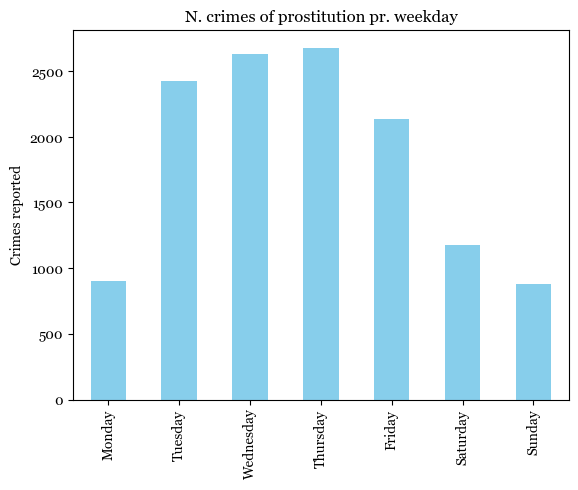

In [34]:
fig, ax = plt.subplots()
make_bar_plot(
    report_data.drop_duplicates().reset_index(drop=True), 
    crime_type = "PROSTITUTION",
    period_col = "Weekday", 
    xtick_order = weekday_order, 
    ax = ax,
    exclude_xticks = False,
    costum_title="N. crimes of prostitution pr. weekday")



**Answer 4.1.2:** When we plotted the exact time for the reports using a jitterplot and looked at the crimes by the minute, we found that they happened irregularly. Most of the crimes was being reported at even numbers. Thus one could be tricked to think that crimes happen most often at even numbers. It would be relevant to only use the data within the hour, as officials could be tricked to think that certain crimes happen at certain times within the hour and focus on these timespots which would be incorrect. 

**Answer 4.1.3:** Looking at our geoplot we see that the Hall of Justice is a very popular location for sex offences. Looking more into this we find that this spot is actually a police station. Hopefully a lot of sexual offences does not happen at the police station, and this instead is a result of the bureaucratic procedure. One could think that if a victim cant give a location, it simply becomes the police station which is marked as the location. If we where to help the police with hotspots for sexual offences it would therefore be essential that we also followed up on the hotspots and did not advice the police to focus their ressources on their own policestation.

**Question 4.2:** Find your own example of human noise in the data and visualize it.

C:\Users\asger\AppData\Local\Temp\ipykernel_12980\2336545479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dec_df["Date_month"] = dec_df["Date"].dt.day


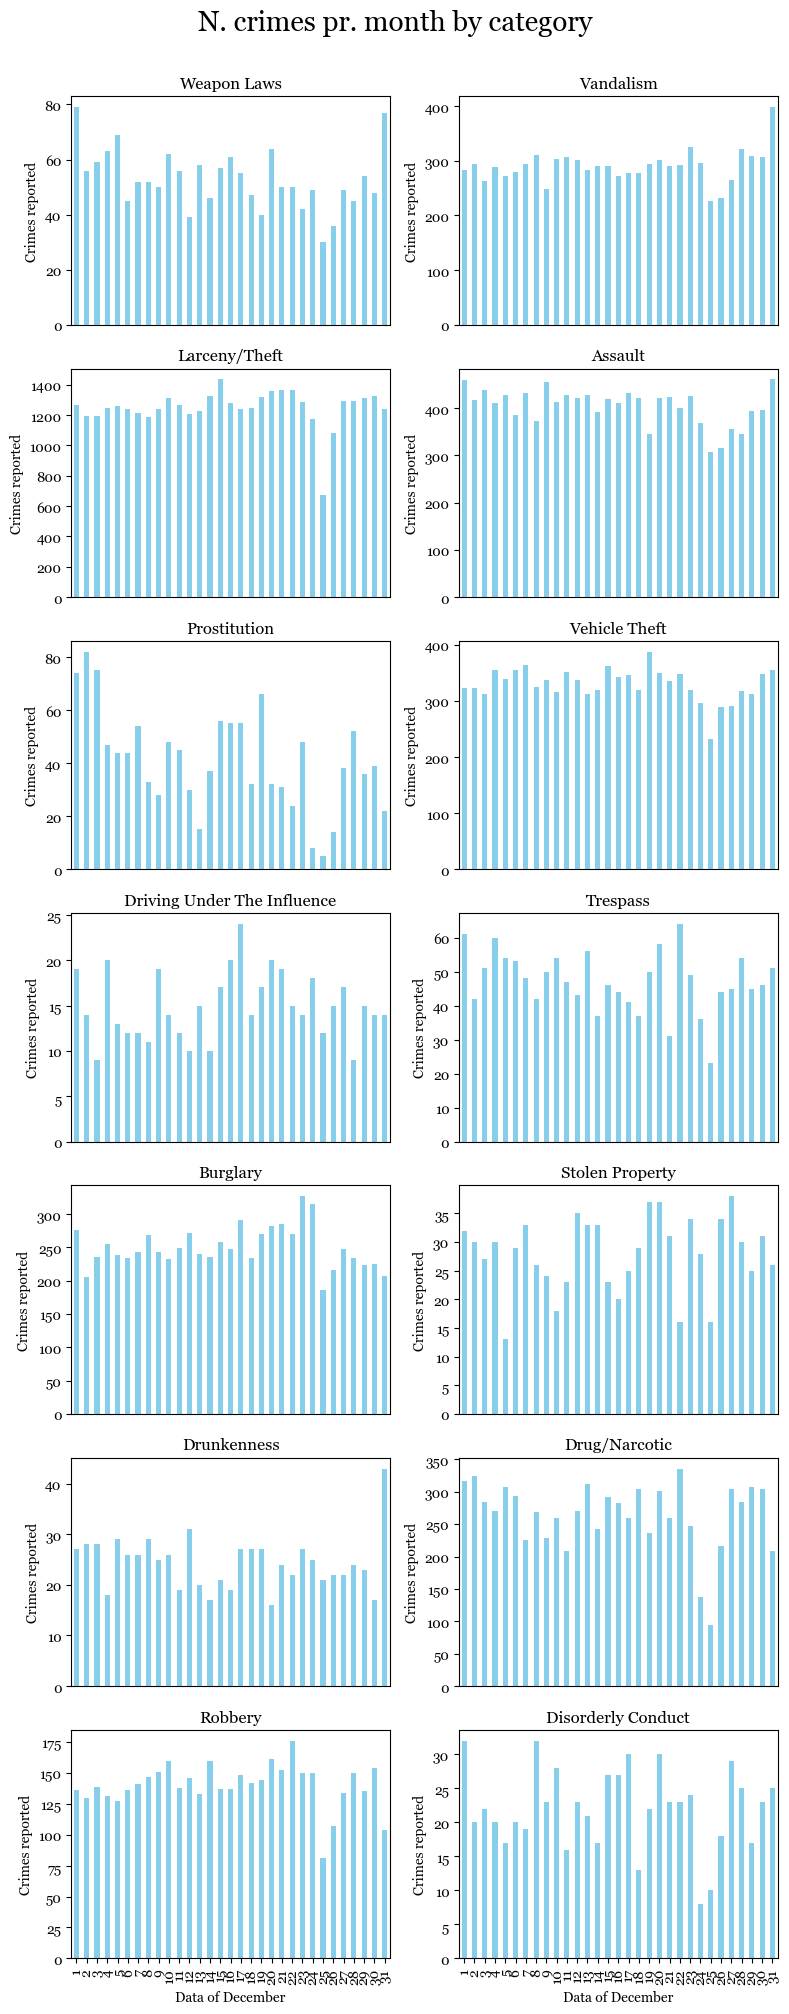

In [49]:
dec_df = report_data[report_data["Month"]=="December"]
dec_df["Date_month"] = dec_df["Date"].dt.day
date_of_month = range(1,32)

plot_reports_in_periods(dec_df, 
                        period_col = "Date_month", 
                        xtick_order= date_of_month, 
                        x_label = "Data of December", 
                        title = "N. crimes pr. month by category", 
                        n_fig_rows = 7, 
                        n_fig_cols = 2)

**Answer 4.2:** In Question 1.1, we found that December in general had a lower crime rate. We have a suspicion that this is a result of Christmas vacation and especially the holidays of the 24th and the 25th. We will therefore visualize the crime rates in December, and see if we find any irregularities. Using the plot function from A1 Part 1, we can easily plot the data of December for at closer look.   

In the above plots it is apparent, that nearly all the crimes has the least amount of activity right the 24th and the 25th of December. The three exceptions to this rule is **Drunkennes** and **Driving under influence**. All of the other crime types are the lowest right around the American Christmas. A conclusion to this would be that the people of San Francisco are less criminal in december. But when looking into the overall criminal tendencies in the Christmas holidays, it seems that crimes like **Larcency Theft** and **Burglary** are actually at higher risk in the holidays (ABC 2022). 

Therefore we think these results could be an example of bias and human noise in the data. First an explanation for the lower crime rates in San Francisco in December, could be that the police of San Francisco is understaffed, and this especially becomes problematic in december and the christmas days, when the officers seek to be with their families (SFGATE 2015 & San Francisco Examiner 2020). Another of possible human noice in the dataset, could be that the crime reports of **Larcency/Theft**, **Burglary**, or **Vehicle Theft**, is first discovered the day after the holidays because people are visiting family. Therefore the victims first report the crimes when they return home, and find that they have been robbed.    

[ABC (2022)](https://www.sfexaminer.com/archives/study-finds-sfpd-patrol-staffing-severely-inadequate/article_ec451de3-a872-548f-af37-ac9916d59345.html)

[SFGATE (2015)](https://www.sfgate.com/politics/article/Plan-to-increase-S-F-police-staffing-advances-6329285.php)

[San Francisco Examiner (2020)](https://www.abc.net.au/news/2022-12-28/christmas-holiday-season-for-your-home-to-be-burgled-keep-safe/101810282)